# 1. Load your dataset.

In [43]:
# IMPORTATION DE LIBRAIRIES ET OUTILS NECESSAIRES.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# CHARGEMENT DES DONNEES.

df = pd.read_csv("CC_GENERAL.csv", ",")

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [45]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [47]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

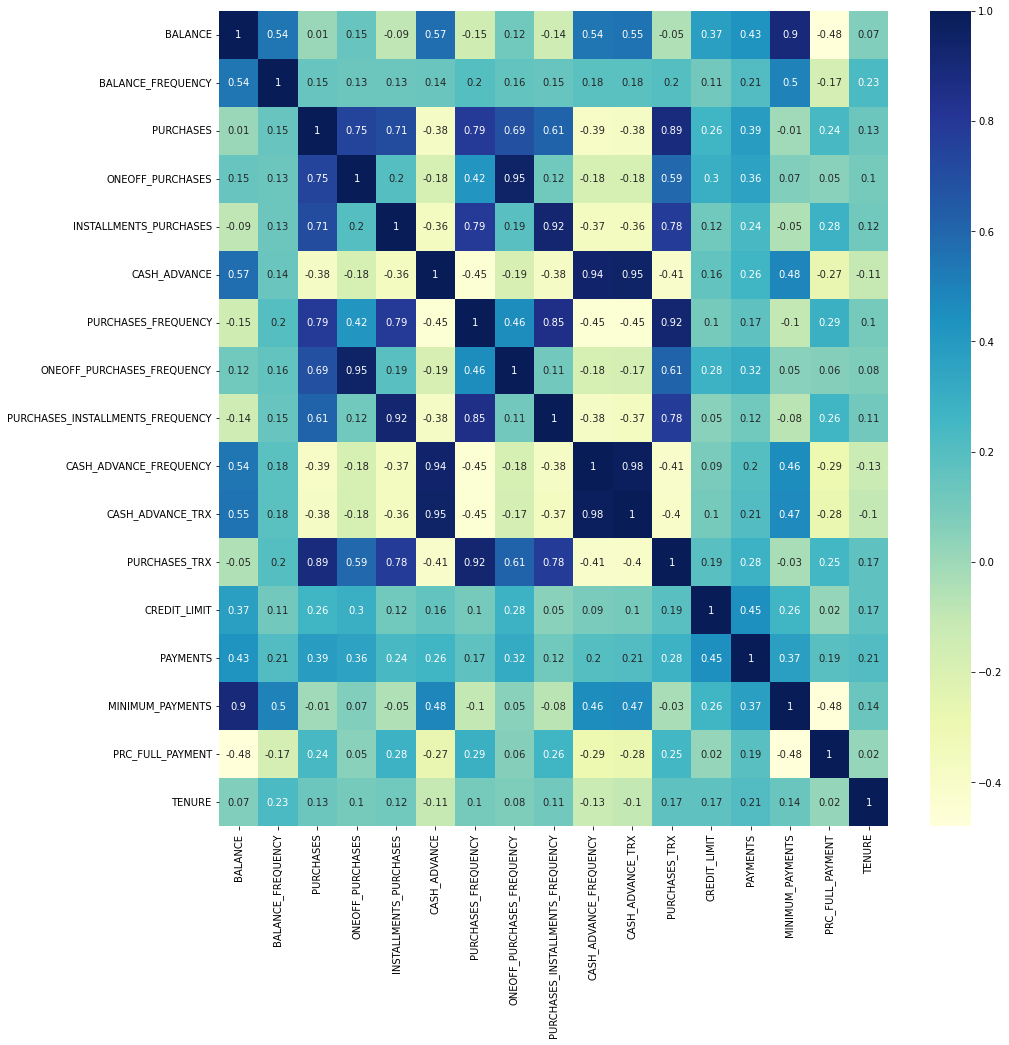

In [49]:
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(round(df.corr(method='spearman'), 2), 
            annot=True, mask=None, cmap='YlGnBu')
plt.show()


In [50]:
# NETTOYAGE DES DONNEES.


def preprocess_data(new_df):
    new_df['MINIMUM_PAYMENTS'].fillna(new_df['MINIMUM_PAYMENTS'].mean(),inplace=True)
    new_df['CREDIT_LIMIT']=new_df.CREDIT_LIMIT.fillna('3000.000000')
    new_df= new_df.drop(['CUST_ID'], axis=1)
    return new_df
data=preprocess_data(df)
data


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# 2. Use hierarchical clustering to identify the inherent groupings within your data.

In [51]:
# STANDARDISONS D'ABORD NOS DONNEES POUR LES METTRE SUR LA MEME ECHELLE.


from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.039353,0.000787,0.091790,0.000000,0.09179,0.000000,0.000160,0.000000,0.00008,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.00000,0.011546
1,0.293876,0.000083,0.000000,0.000000,0.00000,0.591240,0.000000,0.000000,0.00000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.00002,0.001101
2,0.310798,0.000125,0.096307,0.096307,0.00000,0.000000,0.000125,0.000125,0.00000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.00000,0.001495
3,0.207829,0.000079,0.186921,0.186921,0.00000,0.025661,0.000010,0.000010,0.00000,0.000010,0.000125,0.000125,0.935229,0.000000,0.107764,0.00000,0.001496
4,0.504284,0.000617,0.009867,0.009867,0.00000,0.000000,0.000051,0.000051,0.00000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.00000,0.007400


In [52]:
# REDUISONS LES DIMENSIONS DES DONNEES POUR UNE MANIPULATION PLUS FACILE.


from sklearn.decomposition import PCA
pca = PCA(n_components = 2) 
data = pca.fit_transform(data_scaled) 
data = pd.DataFrame(data) 
data.columns = ['P1', 'P2'] 
data.head()


,P1,P2
0,-0.317375,-0.048916
1,0.321474,-0.150306
2,-0.206793,-0.185260
3,-0.270623,-0.123002
4,0.140259,-0.088370


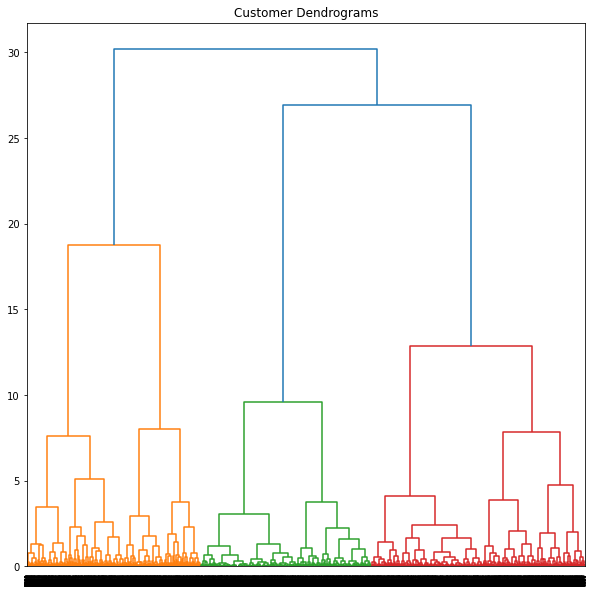

In [53]:
#  TRACER LE "DENDROGRAM" POUR TROUVER LE NOMBRE IDEAL DE "CLUSTERS".


import scipy.cluster.hierarchy as shc
plt.figure(figsize =(10, 10)) 
plt.title('Customer Dendrograms') 
Dendrogram = shc.dendrogram((shc.linkage(data, method ='ward'))) 

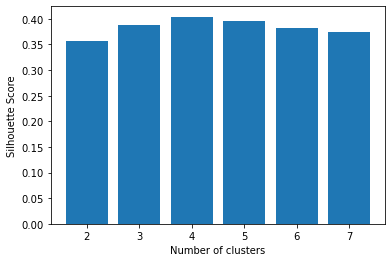

In [54]:
# CALCULER LES "SILHOUETTE_SCORES"


from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering 
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(data, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(data))) 
    
# REPRESENTER LES RESULTATS DANS UN DIAGRAMME EN BARRES. 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 


##### D'après le diagramme ci-dessus, nous voyons que le score le plus élevé est au niveau de 4. Donc nous prendrons 4 comme nombre de clusters.

In [11]:
#HIERARCHICAL CLUSTERING

from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 4 clusters, using euclidean distance as a metric



# 3. Plot the clusters. 

In [56]:
# DIFFERENTS CLUSTERS.

agglomerative=pd.DataFrame(clust_labels)
agglomerative


,0
0,0
1,2
2,0
3,0
4,2
...,...
8945,0
8946,0
8947,0
8948,0


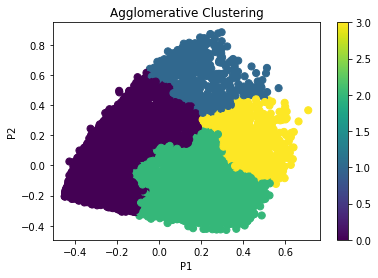

In [58]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['P1'] , data ["P2"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("P1")
ax.set_ylabel("P2")
plt.colorbar(scatter)


# 4. Use K-means clustering. 

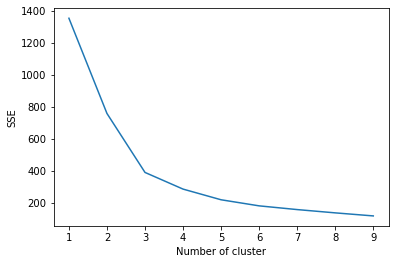

In [14]:
# ELBOW-METHODE POUR TROUVER LE NOMBRE ADEQUAT DE CLUSTERS.


from sklearn.cluster import KMeans
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


##### Il nous semble que le coude se trouve au niveau de 3, mais calculons la "silhouette_scores" pour en être convaincus.

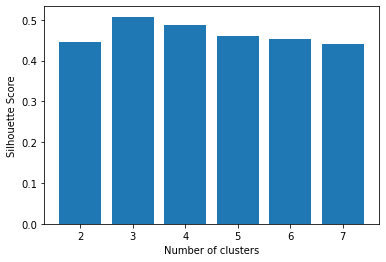

In [15]:
# SILHOUETTE_SCORES


silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(data, KMeans(n_clusters = n_cluster).fit_predict(data))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 


In [16]:
# K-MEANS CLUSTERING AVEC n_clusters=3

kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
labels= kmeans.labels_


# 5. Try different K values and select the best one. 

In [19]:
# K-MEANS CLUSTERING AVEC n_clusters= 4

kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
labels= kmeans.labels_


In [20]:
# K-MEANS CLUSTERING AVEC n_clusters= 5

kmeans = KMeans(n_clusters=5)
kmeans.fit(data)
labels= kmeans.labels_


In [21]:
# K-MEANS CLUSTERING AVEC n_clusters= 6

kmeans = KMeans(n_clusters=6)
kmeans.fit(data)
labels= kmeans.labels_


# 6. Plot the clusters. 

In [17]:
labels=pd.DataFrame(kmeans.labels_)
labels.value_counts()


1    3555
0    3508
2    1887
dtype: int64

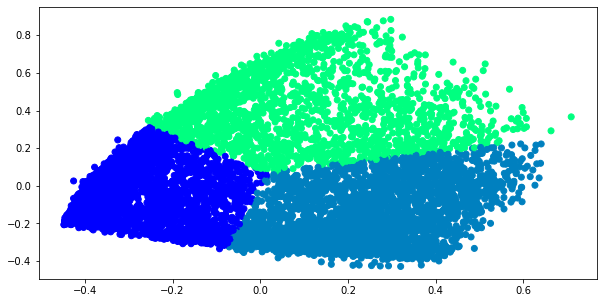

In [28]:
# Visualizing the clustering with n_clusters = 3

fig =plt.figure(figsize=(10,5))
plt.scatter(data['P1'], data['P2'],  
           c = KMeans(n_clusters = 3).fit_predict(data), cmap =plt.cm.winter) 
plt.show() 


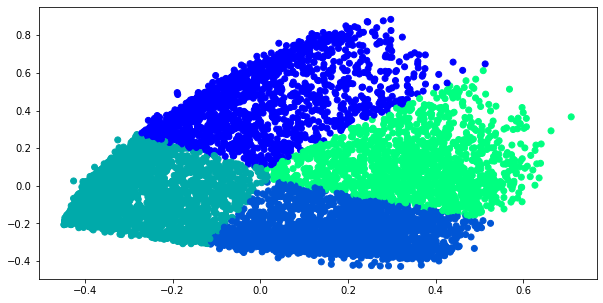

In [27]:
# Visualizing the clustering with n_clusters = 4

fig =plt.figure(figsize=(10,5))
plt.scatter(data['P1'], data['P2'],  
           c = KMeans(n_clusters = 4).fit_predict(data), cmap =plt.cm.winter) 
plt.show() 


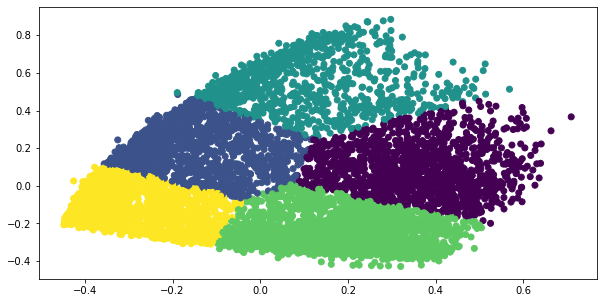

In [42]:
# Visualizing the clustering with n_clusters = 5

fig =plt.figure(figsize=(10,5))
plt.scatter(data['P1'], data['P2'],  
           c = KMeans(n_clusters = 5).fit_predict(data), cmap='viridis') 
plt.show() 


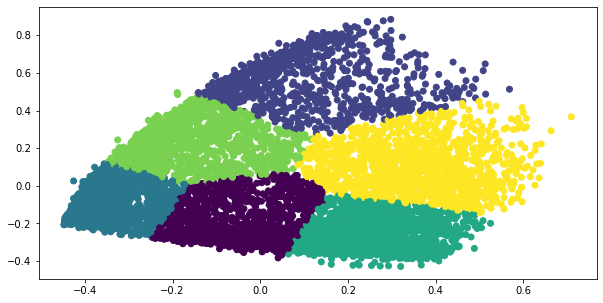

In [41]:
# Visualizing the clustering with n_clusters = 6

fig =plt.figure(figsize=(10,5))
plt.scatter(data['P1'], data['P2'],  
           c = KMeans(n_clusters = 6).fit_predict(data), cmap='viridis') 
plt.show() 


# 7. Compare the two results. 

### Bonus: Search for another validation metric